In [27]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate


from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 

import numpy as np
from math import pi

In [28]:
def grover_d():
    qc = QuantumCircuit(3)
    #Diffusor
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(0)
    qc.ccx(1,2,0)
    qc.h(0)
    qc.barrier()
    qc.x([0,1,2])
    qc.h([0,1,2])

    qc.name="G"
    return qc

In [29]:
def oracle1_d():
    qc = QuantumCircuit(4)
    qc.x(2)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(2)
    qc.name="h1"
    return qc

In [30]:
def oracle2_d():
    qc = QuantumCircuit(4)
    qc.x(1)
    gate = MCXGate(3)
    qc.append(gate, [0, 1, 2, 3])
    qc.x(1)
    qc.name="h2"
    return qc

In [31]:
def oracle1_u():
    qc = QuantumCircuit(5)
    qc.x(0)
    qc.x(2)
    qc.x(3)
    gate = MCXGate(4)
    qc.append(gate, [0, 1, 2, 3, 4])
    qc.x(0)
    qc.x(2)
    qc.x(3)
    qc.name="U"
    return qc

In [32]:
def oracle1_u_II():
    qc = QuantumCircuit(9)
    qc.x(0)
    qc.x(6) #changed for different results
    qc.x(7)
    gate = MCXGate(4)
    qc.append(gate, [0, 5, 6, 7, 8])
    qc.x(0)
    qc.x(6)
    qc.x(7)
    qc.name="U"
    return qc    

In [33]:
def oracle1():
    qc = QuantumCircuit(8)
    qc.x(2)
    qc.x(5)
    qc.x(6)
    gate = MCXGate(6)
    qc.append(gate, [0, 1, 2, 4, 5, 6, 7])
    qc.x(2)
    qc.x(5)
    qc.x(6)
    qc.name="O1"
    return qc

In [34]:
#For different results changed

def oracle1_II():
    qc = QuantumCircuit(12)
    qc.x(2)
    qc.x(9)
    qc.x(10)
    gate = MCXGate(6)
    qc.append(gate, [0, 1, 2, 8, 9, 10, 11])
    qc.x(2)
    qc.x(9)
    qc.x(10)
    qc.name="O1"
    return qc

In [35]:
def lower():
    qc = QuantumCircuit(4)
    #Preparation
    qc.h([0,1,2])
  
    #Preparation of Aux
    qc.x(3)
    qc.h(3)

    qc.barrier()
    qc.append(oracle1_d(),range(4))
    qc.append(oracle2_d(),range(4))

    qc.h(3)
    qc.append(grover_d(),range(3))

    qc.name="Lower"
    return qc


In [36]:
def up_1():
    qc = QuantumCircuit(8)
    #Preparation
    qc.h([4,5,6])

    #Preparation of Aux
    qc.x(7)
    qc.h(7)

    qc.barrier()
    qc.append(oracle1(),range(8))
    qc.append(oracle2_d(),range(4))
    qc.append(oracle1_u(),[3,4,5,6,7])
    qc.append(grover_d(),[4,5,6])
    qc.barrier()
    qc.append(oracle1(),range(8))
    qc.append(oracle1_u(),[3,4,5,6,7])
    qc.h(7)
    qc.append(grover_d(),[4,5,6])
    qc.append(oracle2_d(),range(4)) #Reset the old info
    qc.name="UP1"
    return qc



In [37]:
def up_2():
    qc = QuantumCircuit(12)
    #Preparation
    qc.h([8,9,10])

    #Preparation of Aux
    qc.x(11)
    qc.h(11)
    qc.barrier()
    
    #qc.append(oracle2_d(),range(4)) #Reset the old info

    qc.append(oracle1_II(),range(12)) 
    qc.append(oracle1_d(),range(4))
    qc.append(oracle1_u_II(),[3,4,5,6,7,8,9,10,11])
   
    qc.append(grover_d(),[8,9,10])

    qc.barrier()
    qc.append(oracle1_II(),range(12))
    qc.append(oracle1_u_II(),[3,4,5,6,7,8,9,10,11])

    qc.h(11)
    qc.append(grover_d(),[8,9,10])
    qc.name="UP2"
    return qc


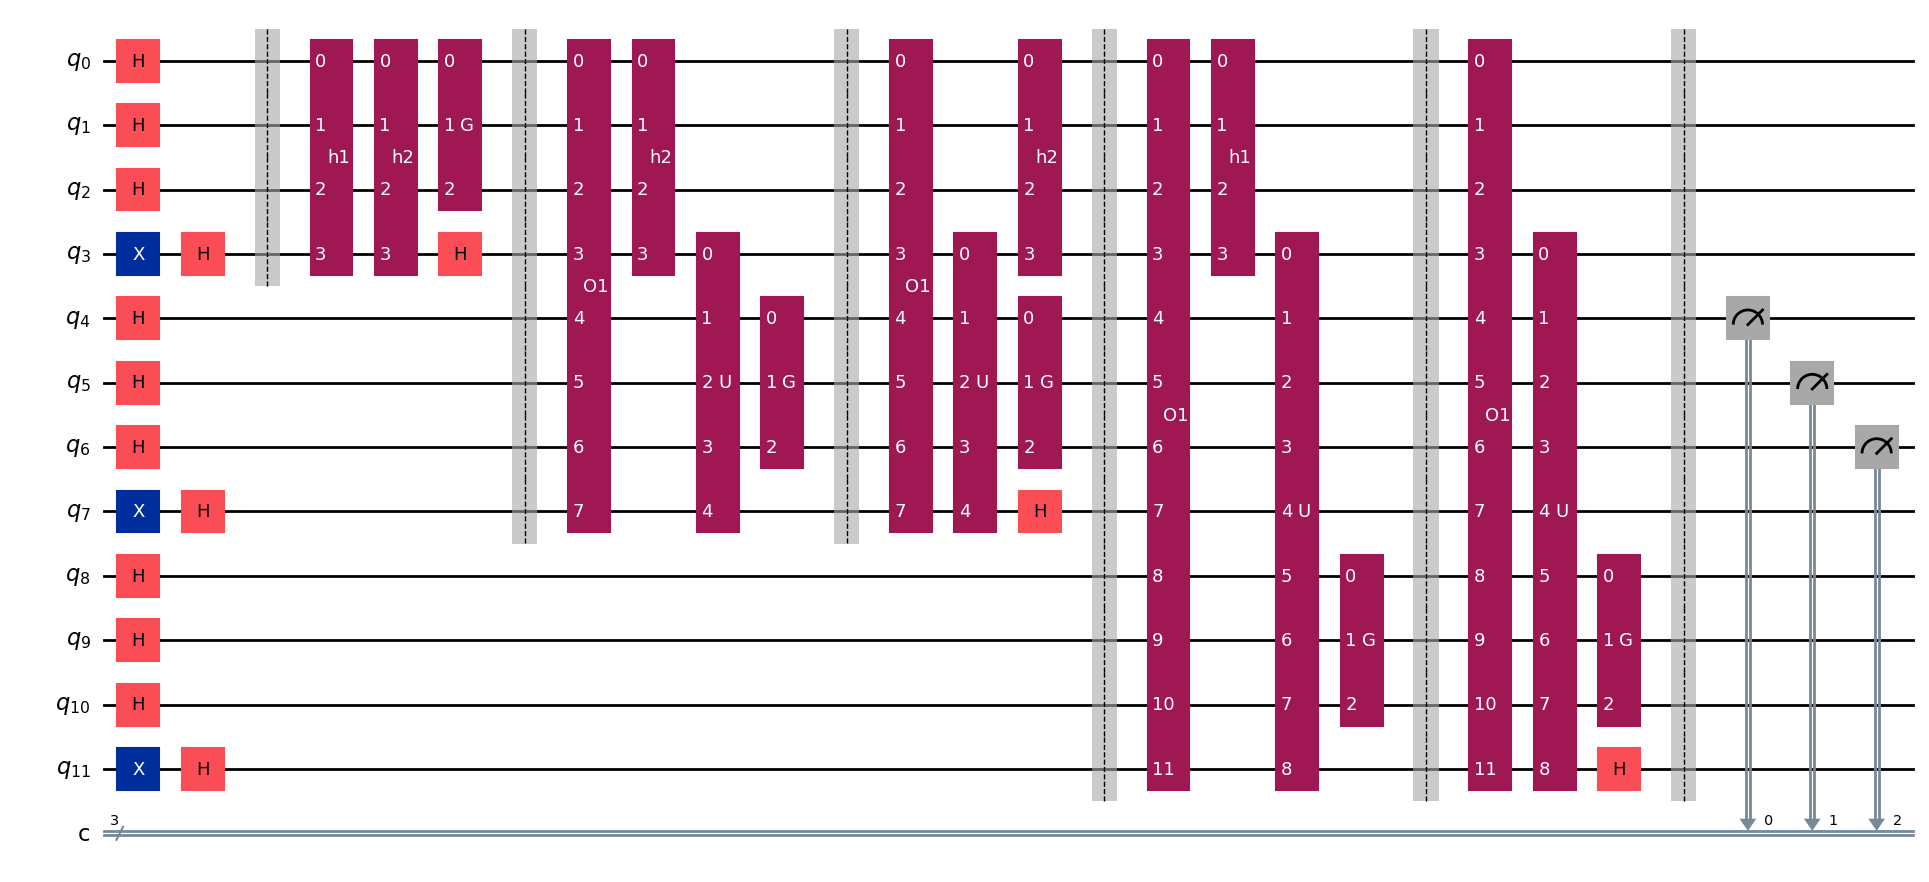

In [38]:
qc = QuantumCircuit(12,3)

qc.append(lower(),range(4))
qc.append(up_1(),range(8))
qc.append(up_2(),range(12))

qc.barrier()
#The measurment of lower and two possible upper spaces are NOT entangelet



#qc.measure(0,0)
#qc.measure(1,1)
#qc.measure(2,2)

qc.measure(4,0)
qc.measure(5,1)
qc.measure(6,2)

#qc.measure(8,0)
#qc.measure(9,1)
#qc.measure(10,2)

qc.decompose().draw('mpl',fold=220)


Total count are: {'111': 86, '011': 72, '001': 9430, '110': 80, '100': 83, '010': 88, '000': 81, '101': 80}


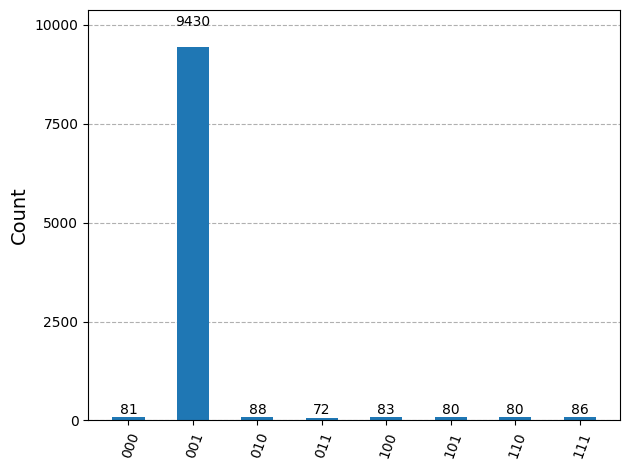

In [39]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose().decompose().decompose().decompose().decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)